In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from tqdm import tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\druthi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\druthi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv(r"D:\Main project\Execution\final\jigsaw-toxic-comment-classification-challenge\train.csv\train.csv")

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [5]:
df.shape

(159571, 8)

In [6]:
df.drop(columns=['id'],inplace=True)

In [7]:
df.isna().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [10]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(159571, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [15]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


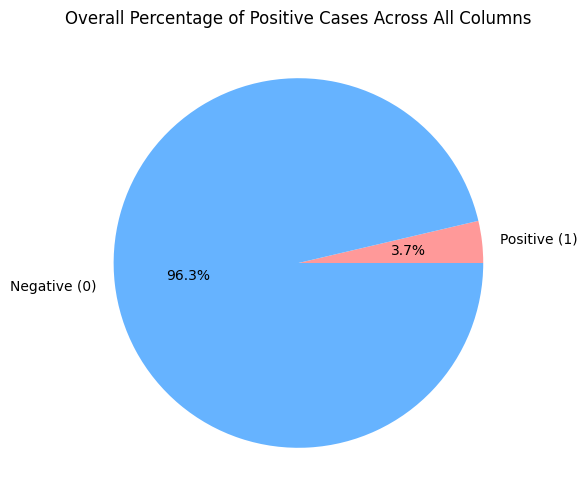

In [16]:
import matplotlib.pyplot as plt

positive_count = (df.iloc[:, 1:] == 1).sum().sum()
total_count = df.iloc[:, 1:].size 

plt.figure(figsize=(6, 6))
plt.pie(
    [positive_count, total_count - positive_count],
    labels=['Positive (1)', 'Negative (0)'],
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff']
)
plt.title('Overall Percentage of Positive Cases Across All Columns')
plt.show()

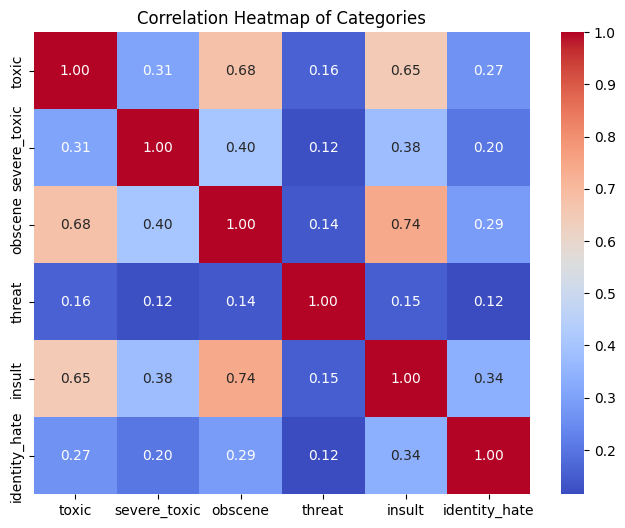

In [17]:
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Categories')
plt.show()

C:\Users\druthi\AppData\Local\Temp\ipykernel_1916\2529017590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_counts.index, y=positive_counts.values, palette="coolwarm")


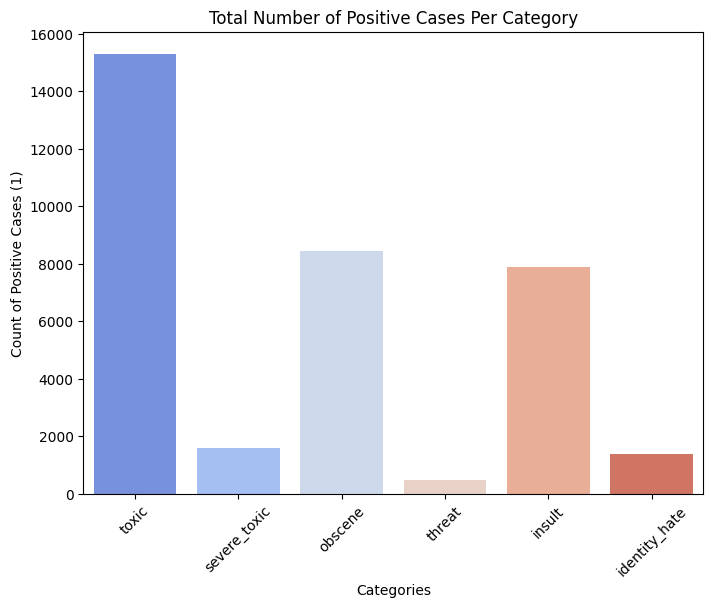

In [18]:
positive_counts = df.iloc[:, 1:].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=positive_counts.index, y=positive_counts.values, palette="coolwarm")
plt.title('Total Number of Positive Cases Per Category')
plt.xlabel('Categories')
plt.ylabel('Count of Positive Cases (1)')
plt.xticks(rotation=45)
plt.show()

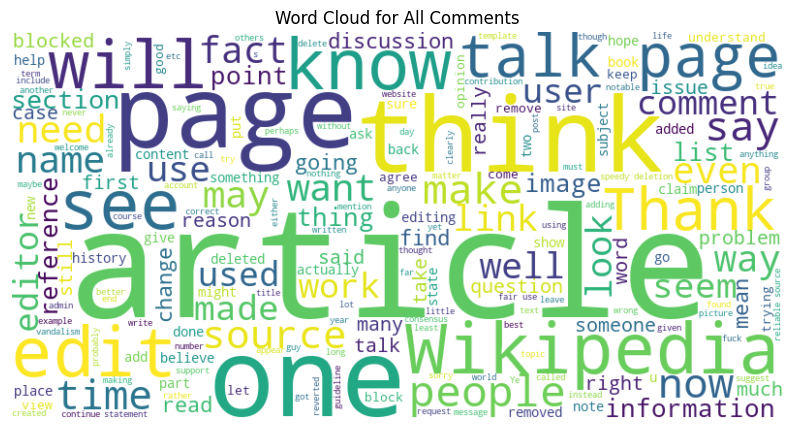

In [19]:
text = " ".join(df['comment_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Comments')
plt.show()

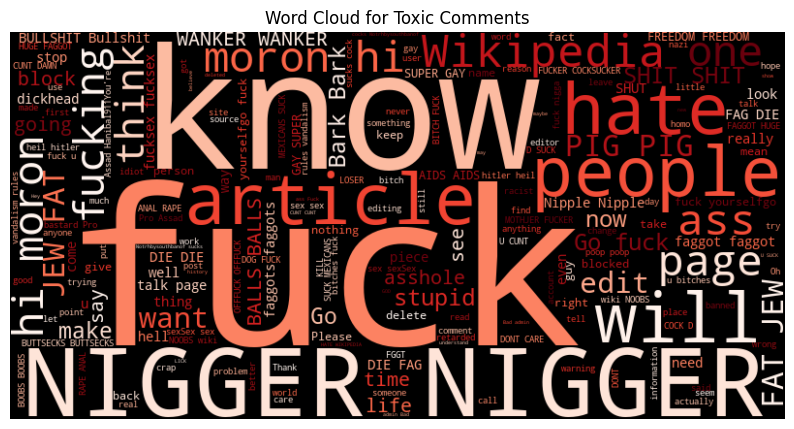

In [20]:
toxic_text = " ".join(df[df['toxic'] == 1]['comment_text'].astype(str))
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(toxic_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

In [21]:
def preprocess_text(text):    
    stop_words = set(stopwords.words('english'))
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stop_words] 
    return text

df['tokens'] = df['comment_text'].apply(preprocess_text)

In [22]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=200,  window=10, min_count=5, sg=1, epochs=15, workers=4)
word_vectors = w2v_model.wv

In [23]:
def get_average_word2vec(tokens, model, vector_size):
    if len(tokens) == 0:
        return np.zeros(vector_size)
    vector_sum = np.sum([model[word] for word in tokens if word in model], axis=0)
    return vector_sum / len(tokens)

In [24]:
df['w2v_features'] = df['tokens'].apply(lambda x: get_average_word2vec(x, word_vectors, 100))
df['w2v_features']

0         [0.1275504, 0.09170371, 0.027346961, -0.163086...
1         [-0.008774848, 0.08942815, -0.065721415, 0.041...
2         [-0.02279314, 0.12435902, -0.09938953, -0.1044...
3         [0.074144214, -0.0047739963, -0.1373585, -0.02...
4         [-0.088487856, 0.10452205, 0.18624933, -0.1945...
                                ...                        
159566    [0.08905729, 0.028612215, -0.1422922, 0.015249...
159567    [0.08426604, 0.07103049, 0.029966129, -0.14385...
159568    [0.12519664, 0.0797321, 0.13223904, -0.0244242...
159569    [0.04396156, 0.061765213, -0.0008707709, -0.26...
159570    [0.040375058, 0.082013175, -0.06675853, 0.0303...
Name: w2v_features, Length: 159571, dtype: object

In [25]:
df['vector_shape'] = df['w2v_features'].apply(lambda x: np.array(x).shape)
print(df['vector_shape'].value_counts())
df = df[df['vector_shape'] == (200,)]
df['w2v_features'] = df['w2v_features'].apply(lambda x: np.array(x, dtype=np.float32))
X = np.vstack(df['w2v_features'].values)


vector_shape
(200,)    159425
(100,)        77
()            69
Name: count, dtype: int64


C:\Users\druthi\AppData\Local\Temp\ipykernel_1916\2486111494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w2v_features'] = df['w2v_features'].apply(lambda x: np.array(x, dtype=np.float32))


In [26]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = df[target_columns]
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import time

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train),len(y_test)

(127540, 31885)

In [29]:
dt1=DecisionTreeClassifier()
start_time=time.time()
dt1.fit(x_train,y_train)
end_time=time.time()
dtt=end_time-start_time
dt1_pred=dt1.predict(x_test)
print("Accuracy of Decision Tree:",accuracy_score(dt1_pred,y_test))
print(classification_report(dt1_pred,y_test))

Accuracy of Decision Tree: 0.8481731221577544
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      3610
           1       0.31      0.29      0.30       362
           2       0.57      0.51      0.54      1959
           3       0.09      0.07      0.08       113
           4       0.49      0.46      0.48      1749
           5       0.18      0.15      0.17       349

   micro avg       0.52      0.46      0.49      8142
   macro avg       0.37      0.33      0.35      8142
weighted avg       0.52      0.46      0.49      8142
 samples avg       0.05      0.05      0.04      8142



C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

In [30]:
rf1=RandomForestClassifier()
start_time=time.time()
rf1.fit(x_train,y_train)
end_time=time.time()
rft=end_time-start_time
rf1_pred=rf1.predict(x_test)
print("Accuracy of Random Forest:",accuracy_score(rf1_pred,y_test))
print(classification_report(rf1_pred,y_test))

Accuracy of Random Forest: 0.9086404265328525
              precision    recall  f1-score   support

           0       0.50      0.89      0.64      1760
           1       0.13      0.63      0.21        68
           2       0.51      0.90      0.65       988
           3       0.06      0.71      0.10         7
           4       0.43      0.82      0.57       864
           5       0.04      0.73      0.07        15

   micro avg       0.44      0.87      0.59      3702
   macro avg       0.28      0.78      0.37      3702
weighted avg       0.48      0.87      0.61      3702
 samples avg       0.04      0.05      0.04      3702



C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

In [31]:
KNN1=KNeighborsClassifier()
start_time=time.time()
KNN1.fit(x_train,y_train)
end_time=time.time()
KNNt=end_time-start_time
KNN1_pred=KNN1.predict(x_test)
print("Accuracy of KNN:",accuracy_score(KNN1_pred,y_test))
print(classification_report(KNN1_pred,y_test))

C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy of KNN: 0.9058491453661597
              precision    recall  f1-score   support

           0       0.58      0.83      0.69      2205
           1       0.30      0.40      0.34       253
           2       0.68      0.78      0.73      1516
           3       0.15      0.33      0.20        39
           4       0.59      0.69      0.64      1410
           5       0.22      0.56      0.31       115

   micro avg       0.58      0.75      0.65      5538
   macro avg       0.42      0.60      0.49      5538
weighted avg       0.59      0.75      0.66      5538
 samples avg       0.05      0.05      0.05      5538



C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

In [32]:
XGB1= XGBClassifier(eval_metric='logloss')
start_time=time.time()
XGB1.fit(x_train,y_train)
end_time=time.time()
XGBt=end_time-start_time
XGB1_pred=XGB1.predict(x_test)
print("Accuracy of XGB:",accuracy_score(XGB1_pred,y_test))
print(classification_report(XGB1_pred,y_test))

Accuracy of XGB: 0.911368982280069
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      2472
           1       0.24      0.49      0.32       169
           2       0.69      0.85      0.76      1418
           3       0.13      0.48      0.21        25
           4       0.58      0.74      0.65      1274
           5       0.24      0.71      0.36       101

   micro avg       0.61      0.80      0.69      5459
   macro avg       0.43      0.68      0.51      5459
weighted avg       0.63      0.80      0.70      5459
 samples avg       0.05      0.06      0.05      5459



C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\druthi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

In [33]:
results_df={"Algorithm":['Decision Tree','Random Forest','KNN','XGB'],"Accuracy":[accuracy_score(dt1_pred,y_test),accuracy_score(rf1_pred,y_test),accuracy_score(KNN1_pred,y_test),accuracy_score(XGB1_pred,y_test)],   
           }
results_df=pd.DataFrame(results_df)
results_df

,Algorithm,Accuracy
0,Decision Tree,0.848173
1,Random Forest,0.908640
2,KNN,0.905849
3,XGB,0.911369


<Axes: title={'center': 'Accuracies of algorithms'}, xlabel='Algorithm', ylabel='Accuracy'>

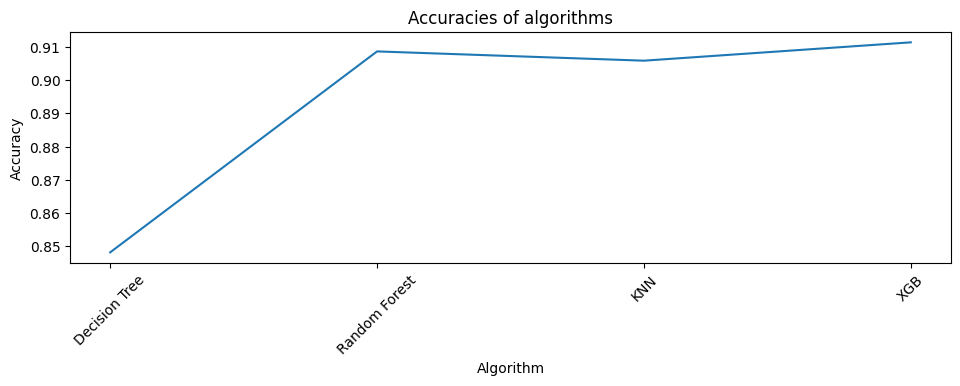

In [34]:
plt.figure(figsize=(25,3))
plt.subplot(1,2,1)
plt.title("Accuracies of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Accuracy'])

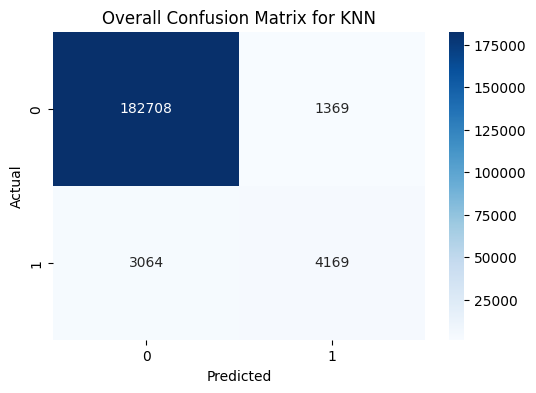

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Flatten all labels into a single 1D array
y_test_flat = y_test.values.flatten()
KNN1_pred_flat = KNN1_pred.flatten()

# Compute the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test_flat, KNN1_pred_flat)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(overall_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Overall Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


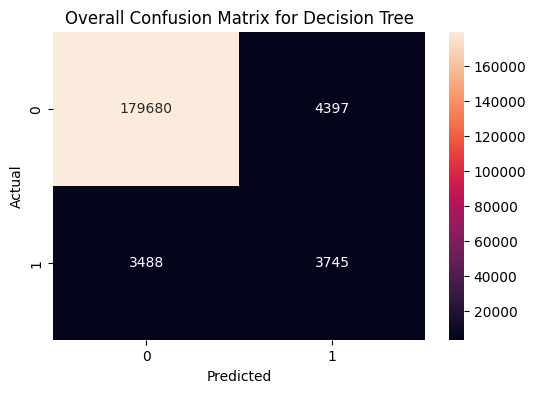

In [36]:
y_test_flat = y_test.values.flatten()
dt1_pred_flat = dt1_pred.flatten()

# Compute the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test_flat, dt1_pred_flat)

# Plot the confusion matrix with a visually appealing color map
plt.figure(figsize=(6, 4))
sns.heatmap(overall_conf_matrix, annot=True, fmt="d", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Overall Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


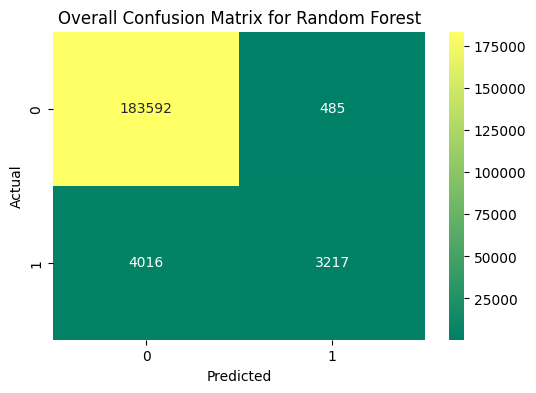

In [37]:
y_test_flat = y_test.values.flatten()
rf1_pred_flat = rf1_pred.flatten()

# Compute the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test_flat, rf1_pred_flat)

# Plot the confusion matrix using the same "summer" colormap
plt.figure(figsize=(6, 4))
sns.heatmap(overall_conf_matrix, annot=True, fmt="d", cmap="summer", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Overall Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

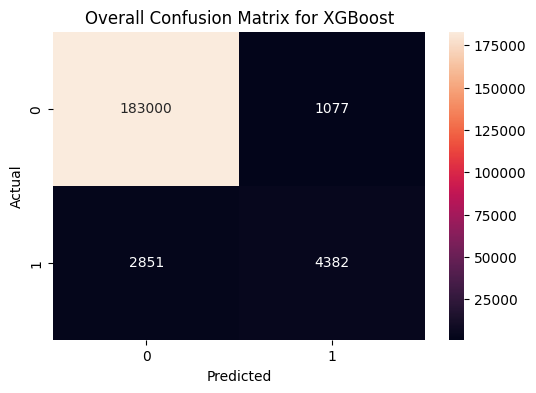

In [38]:
y_test_flat = y_test.values.flatten()
XGB1_pred_flat = XGB1_pred.flatten()

# Compute the overall confusion matrix
overall_conf_matrix = confusion_matrix(y_test_flat, XGB1_pred_flat)

# Plot the single confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(overall_conf_matrix, annot=True, fmt="d", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Overall Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
import pickle
model_filenames = {
    "DecisionTree": "decision_tree_model.pkl",
    "RandomForest": "random_forest_model.pkl",
    "KNN": "knn_model.pkl",
    "XGB": "xgb_model.pkl"
}
with open(model_filenames["DecisionTree"], 'wb') as f:
    pickle.dump(dt1, f)
with open(model_filenames["RandomForest"], 'wb') as f:
    pickle.dump(rf1, f)
with open(model_filenames["KNN"], 'wb') as f:
    pickle.dump(KNN1, f)
with open(model_filenames["XGB"], 'wb') as f:
    pickle.dump(XGB1, f)
loaded_models = {}
for model_name, filename in model_filenames.items():
    with open(filename, 'rb') as f:
        loaded_models[model_name] = pickle.load(f)
def predict_comment(comment):
    tokens = preprocess_text(comment)
    w2v_features = get_average_word2vec(tokens, word_vectors, 100)
    w2v_features = np.array(w2v_features).reshape(1, -1)  
    predictions = {}
    for model_name, model in loaded_models.items():
        pred = model.predict(w2v_features)
        predictions[model_name] = pred.tolist()[0] 
    return predictions
print("\nEnter a comment for prediction:")
user_input = input("Comment: ")
results = predict_comment(user_input)

target_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_attack"]

print("\nPredictions for the comment:")
for model_name, prediction in results.items():
    toxic_labels = [label for label, value in zip(target_columns, prediction) if value == 1]
    
    if toxic_labels:
        print(f"{model_name}: {', '.join(toxic_labels)}")
    else:
        print(f"{model_name}: No toxicity")    


Enter a comment for prediction:

Predictions for the comment:
DecisionTree: toxic, obscene, insult
RandomForest: toxic, obscene, insult
KNN: toxic, obscene, insult
XGB: toxic, obscene, insult


Enter a comment:
shit


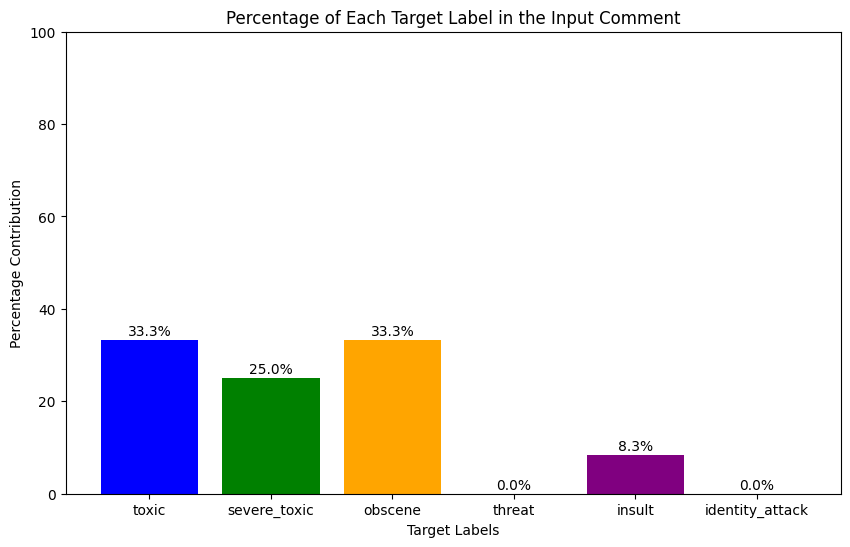


🚨 Warning: You cannot send this type of messages


In [44]:
def plot_label_percentages(comment):
    target_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_attack"]
    tokens = preprocess_text(comment)
    label_contributions = {label: 0 for label in target_columns}
    
    for word in tokens:
        if word in word_vectors:
            word_vector = word_vectors[word].reshape(1, -1)
            for model_name, model in loaded_models.items():
                pred = model.predict(word_vector)
                for label, value in zip(target_columns, pred[0]):
                    label_contributions[label] += value

    total_contributions = sum(label_contributions.values())
    toxicity_percentage = 0
    if total_contributions > 0:
        for label in label_contributions:
            label_contributions[label] = (label_contributions[label] / total_contributions) * 100
        toxicity_percentage = sum(label_contributions.values())

    labels = list(label_contributions.keys())
    percentages = list(label_contributions.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, percentages, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
    plt.xlabel("Target Labels")
    plt.ylabel("Percentage Contribution")
    plt.title("Percentage of Each Target Label in the Input Comment")
    plt.ylim(0, 100)
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)
    plt.show()

    if toxicity_percentage > 40:
        print("\n🚨 Warning: You cannot send this type of messages")
    else:
        print("🥳Hurry! Message was sent successfully")
        

print("Enter a comment:")
user_input = input("Comment: ")
print(user_input)
plot_label_percentages(user_input)